In [1]:
import math
import numpy as np
from sklearn import datasets

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

In [2]:
def sigmoid(gamma):
    if gamma < 0:
        return 1 - 1 / (1 + math.exp(gamma))
    return 1 / (1 + math.exp(-gamma))

In [3]:
def Log_fit(X_train,y_train,l_rate, lamda,iter):
    wt = X_train[0]

    for i in range(iter):
        D_Ein = 0
        
        for j in range(len(X_train)):

            y_wt = -y_train[j] * wt
            
            sig_input = np.dot(y_wt, X_train[j])  
            
            sig_output = sigmoid(sig_input)

            yn = -1 * y_train[j]
            
            y_x_n = yn * X_train[j]
                               
            D_Ein += (sig_output * y_x_n)

        D_Ein /= len(X_train)
        
        D_Ein += ((2 * lamda * wt)/len(X_train)) #adding the regularizer
      
        
        wt = wt - (l_rate * D_Ein)
        
    return wt         

In [4]:
def sigmoid_array(array):
    for i in range(len(array)):
        array[i] = sigmoid(array[i])
    return array.astype(int)

In [5]:
def binary_classifier(array, threshold):
    for j in range(len(array)):
        if (array[j] - threshold) < 0:
            array[j] = -1
        else: array[j] = 1
    return array

In [6]:
def error_rate(array, y):
    mist_count = 0
    for k in range(len(array)):
        if array[k] != y[k]:
            mist_count += 1
    return mist_count/len(array)

In [7]:
def main():
    breast_cancer = datasets.load_breast_cancer() #loading the breast cancer dataset
    breast_cancer.target[breast_cancer.target == 0] = -1 #to perform gradient descent
    
    trans = PolynomialFeatures(degree=2)    
    breast_cancer.data = trans.fit_transform(breast_cancer.data)
    
    
#     pca = PCA(n_components = 0.95)
#     breast_cancer.data = pca.fit_transform(breast_cancer.data)
    
#     print(pca.explained_variance_ratio_)
    print(breast_cancer.data.shape)
    
    reg_array = [0, 0.001, 0.01, 0.1, 1.0] #set of regularizer to experiment on
    
    E_in_array = np.zeros(len(reg_array)) #to store the E_in during the 5 cross validation
    E_val_array = np.zeros(len(reg_array))  #to store the E_valduring the 5 cross validation
    
    k = 5 # 5 fold validation
    kf = KFold(n_splits=k)
    
    for i in range(len(reg_array)):
        
        E_in = 0
        E_val = 0
    
        for train_index, test_index in kf.split(breast_cancer.data):            
            X_train, X_test = breast_cancer.data[train_index], breast_cancer.data[test_index] 
            y_train, y_test = breast_cancer.target[train_index], breast_cancer.target[test_index]
 

            wt = Log_fit(X_train, y_train, 0.001, reg_array[i], 10000)#training phase(optimizing weight vector)
    
            
            in_sample_pred = np.dot(X_train, wt) #get the dot product of feature vector with the weight vector
            
            in_sample_pred = sigmoid_array(in_sample_pred) #passing elements of the matrix, to the sigmoid function
            
            in_sample_pred = binary_classifier(in_sample_pred, 0.5) #binary classificaiton using logistic regression
            
            
            E_in += error_rate(in_sample_pred, y_train) #  summing up the in sample error
            
            
            
            val_sample_pred = np.dot(X_test, wt) #get the dot product of feature vector with the weight vector
            
            val_sample_pred = sigmoid_array(val_sample_pred) #passing elements of the matrix, to the sigmoid function
            
            val_sample_pred = binary_classifier(val_sample_pred, 0.5) #binary classificaiton using logistic regression
            

            E_val += error_rate(val_sample_pred, y_test) #summing up the validation error
        
        E_in /= k #weighted average of the in sample error
        E_in_array[i] = E_in
        
        E_val /= k
        E_val_array[i] = E_val #weighted average of the validation error
    
    plt.plot(reg_array, E_in_array, label = "In sample error")
    plt.plot(reg_array, E_val_array, label = "Validation sample error")  
    
    plt.legend()
    plt.xlabel('Regularizer', fontsize=14)
    plt.ylabel('Error rate', fontsize=14)
    plt.show()
    
    print("E_in sample array:", E_in_array)
    print("E_val array:", E_val_array)
    print("Regularizer array: ", reg_array)

(569, 496)


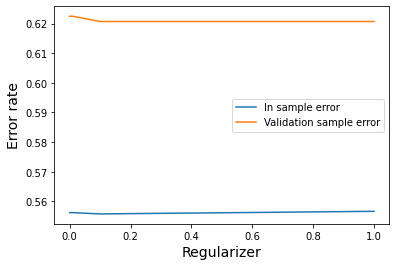

E_in sample array: [0.55619433 0.5561953  0.5561953  0.55575574 0.55663389]
E_val array: [0.62244993 0.62244993 0.62244993 0.62068002 0.62068002]
Regularizer array:  [0, 0.001, 0.01, 0.1, 1.0]


In [8]:
if __name__ == "__main__": main()